In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from scipy import stats

data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1.Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [7]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
from scipy import stats
data = pd.read_csv('HR.csv')
data.head()

column_stat = {}
column_data = list(data.columns)
index_data = []
mean_data = []
median_data = []
mode_data = []
min_data = []
max_data = []
mean_dev_data = []
for name in column_data:
    if data[name].dtypes != object:
        index_data.append(name)
        mean_data.append(statistics.mean(data[name]))
        median_data.append(statistics.median(data[name]))
        try:
            mode_data.append(statistics.mode(data[name]))
        except:
            d={}
            for i in data[name]:
                d.update({i:d.get(i,0)+1})
            max_v = 0
            mode = None
            for k, v in d.items():
                if max_v < v:
                    max_v = v
                    mode = k
            mode_data.append(mode)
        min_data.append(min(data[name]))
        max_data.append(max(data[name]))
        mean_dev_data.append(statistics.pstdev(data[name]))
column_stat.setdefault('mean', mean_data)
column_stat.setdefault('median', median_data)
column_stat.setdefault('mode', mode_data)
column_stat.setdefault('min', min_data)
column_stat.setdefault('max', max_data)
column_stat.setdefault('mean_dev', mean_dev_data)
stat_frame = pd.DataFrame(column_stat, index=index_data)
stat_frame

,mean,median,mode,min,max,mean_dev
satisfaction_level,0.612834,0.64,0.10,0.09,1.0,0.248622
last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171163
number_project,3.803054,4.00,4.00,2.00,7.0,1.232551
average_montly_hours,201.050337,200.00,135.00,96.00,310.0,49.941434
time_spend_company,3.498233,3.00,3.00,2.00,10.0,1.460088
Work_accident,0.144610,0.00,0.00,0.00,1.0,0.351707
left,0.238083,0.00,0.00,0.00,1.0,0.425910
promotion_last_5years,0.021268,0.00,0.00,0.00,1.0,0.144277


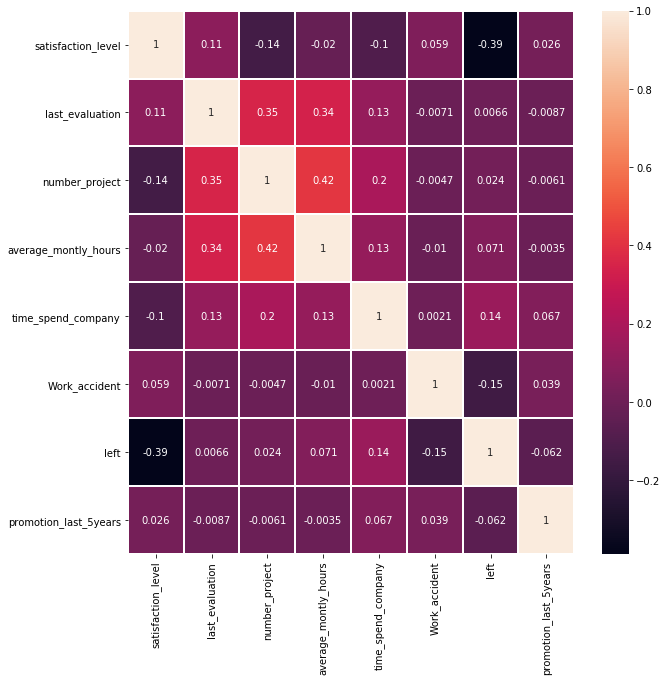

In [3]:
sns.heatmap(data.corr(), annot=True, linewidths=1)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()
# На графике изображены коэффициент корелляции между переменными.
# Из графика видно, что переменные в основном слабо связаны между собой (коэфф близится к 0).
# Среднею связь имеют number_project, last_evaluation и average_montly_hours, а также satisfaction_level и left.

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [4]:
satisfaction_level=data['satisfaction_level']
last_evaluation=data['last_evaluation']
stats.ttest_ind(last_evaluation, satisfaction_level)
# Вывод: последняя оценка зависит от степени удовлетворености сотрудника

Ttest_indResult(statistic=41.89868154070206, pvalue=0.0)

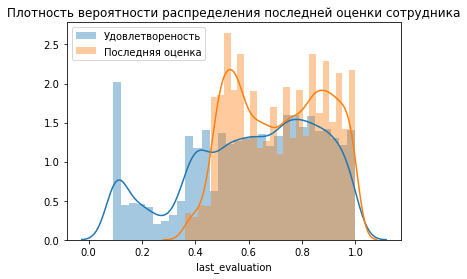

In [5]:
sns.distplot(satisfaction_level)
sns.distplot(last_evaluation)
plt.title('Плотность вероятности распределения последней оценки сотрудника')
plt.legend(['Удовлетвореность', 'Последняя оценка'])
plt.show()
# Вывод: На графике видно, что чем выше удовлетворенность, тем выше оценка за проект

Рассчитать сколько работников работает в каждом департаменте

In [6]:
print('Количество рабочих по департаментам: : \n', data.groupby('sales').satisfaction_level.count())
# Большее количество сотрудников в отделе продаж, меньшее в отдела HR

Количество рабочих по департаментам: : 
 sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64


Показать распределение сотрудников по зарплатам

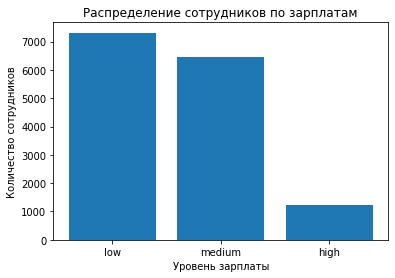

In [7]:
df = data.groupby('salary').satisfaction_level.count()
df = sorted(df, reverse=True)
r = ['low', 'medium', 'high']
plt.bar(r, df)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.show()
# Большинство сотрудников получает низкую или среднюю зарплату

Показать распределение сотрудников по зарплатам совместно с департаментами

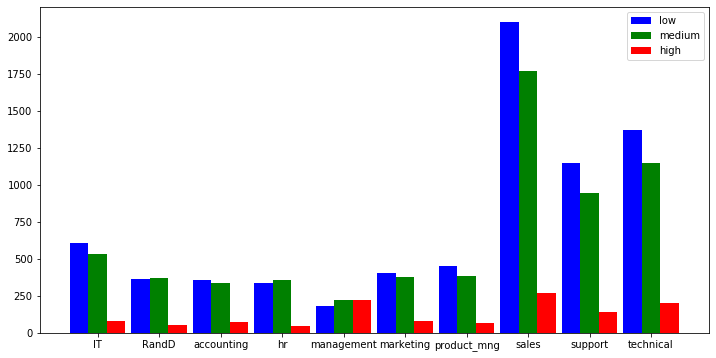

In [8]:
sales_data = data.groupby(['sales', 'salary']).satisfaction_level.count().reset_index()
sales_data.columns = ['sales', 'salary', 'count']

sales = list(data.groupby('sales').groups.keys())
X = np.arange(len(sales))

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)

ax.bar(X - 0.3, sales_data.loc[sales_data['salary'] == 'low']['count'].tolist(), color='b', width=0.3)
ax.bar(X, sales_data.loc[sales_data['salary'] == 'medium']['count'].tolist(), color='g', width=0.3)
ax.bar(X + 0.3, sales_data.loc[sales_data['salary'] == 'high']['count'].tolist(), color='r', width=0.3)
plt.xticks(X, sales)
plt.legend(['low', 'medium', 'high'])
plt.show()
# На графике изображено распределение зарплат по каждому отделу.
# Видно, что в отделе management много сотрудников, получающих высокую зарплату, а в HR-отделе наоборот, высокую зарплату получает малая часть отдела

Сколько сотрудников покинули компанию

In [9]:
data.groupby('left').satisfaction_level.count()
# Из статистики видно, что 3571 человек покинул данную компанию


left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [10]:
# Проверка гипотизы, что увольняются люди с низкой степенью удовлетворености

s_level_leave = data[data['left'] == 0]['satisfaction_level']
s_level_left = data[data['left'] == 1]['satisfaction_level']
stats.ttest_ind(s_level_leave, s_level_left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

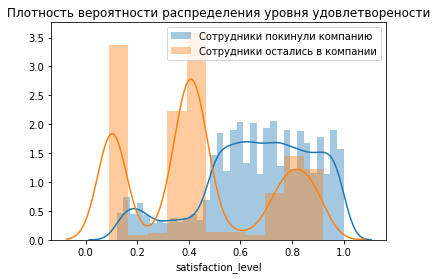

In [11]:
sns.distplot(s_level_leave)
sns.distplot(s_level_left)
plt.title('Плотность вероятности распределения уровня удовлетворености')
plt.legend(['Сотрудники покинули компанию', 'Сотрудники остались в компании'])
plt.show()
# Вывод: степень удовлетворености сотрудников не влияет на их решение покинуть компанию

In [12]:

# Проверка гипотизы, что увольняются люди с низкой зарплатой

salary = {'low': 0, 'medium': 0.5, 'high': 1}
data['salary_value'] = data['salary'].apply(lambda x: salary.get(x))
s_level_leave = data[data['left'] == 0]['salary_value']
s_level_left = data[data['left'] == 1]['salary_value']
stats.ttest_ind(s_level_leave, s_level_left)

Ttest_indResult(statistic=19.58216626170969, pvalue=2.475238171818194e-84)

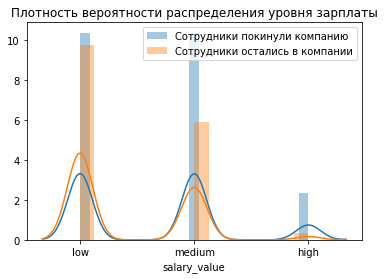

In [13]:
sns.distplot(s_level_leave)
sns.distplot(s_level_left)
plt.title('Плотность вероятности распределения уровня зарплаты')
plt.xticks([0, 0.5, 1], ['low', 'medium', 'high'])
plt.legend(['Сотрудники покинули компанию', 'Сотрудники остались в компании'])
plt.show()
# Вывод: уровень зарплаты сотрудников не влияет на их решение покинуть компанию